# HvPlot Demo

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('closing_price.csv', index_col='Date', parse_dates=True)
df

,AAPL,MSFT,IBM
Date,,,
2019-11-01,62.830273,140.552994,115.847458
2019-11-04,63.242901,141.364731,117.676682
2019-11-05,63.152027,141.276733,117.864746
2019-11-06,63.179031,140.885513,118.625488
2019-11-07,63.908203,141.081116,119.083855
...,...,...,...
2021-10-26,149.102402,309.543671,119.938713
2021-10-27,148.633087,322.579865,118.089584
2021-10-28,152.347656,323.757690,118.721680


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-11-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    504 non-null    float64
 1   MSFT    504 non-null    float64
 2   IBM     504 non-null    float64
dtypes: float64(3)
memory usage: 15.8 KB


In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("figure", figsize=(16, 5))

<Axes: xlabel='Date'>

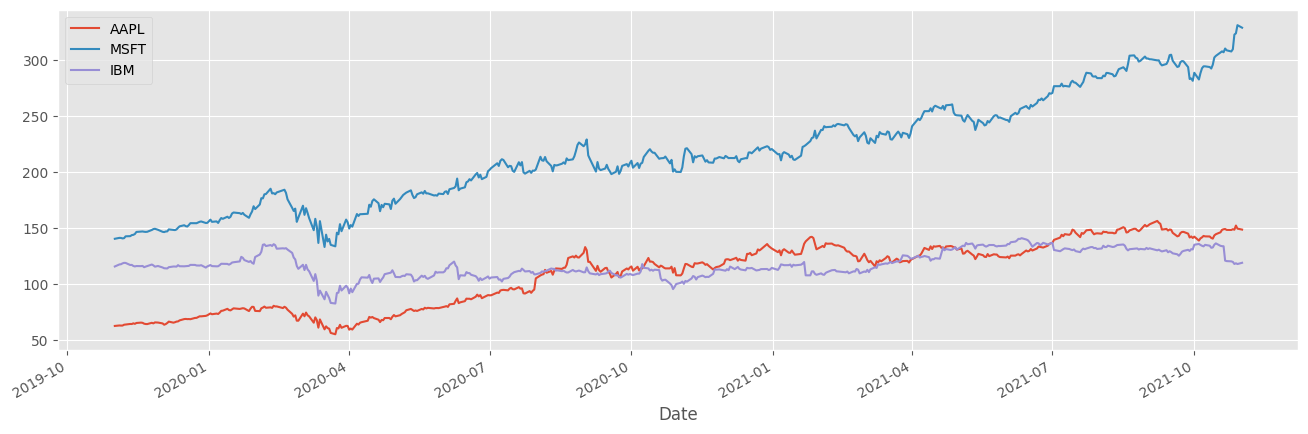

In [22]:
df.plot()

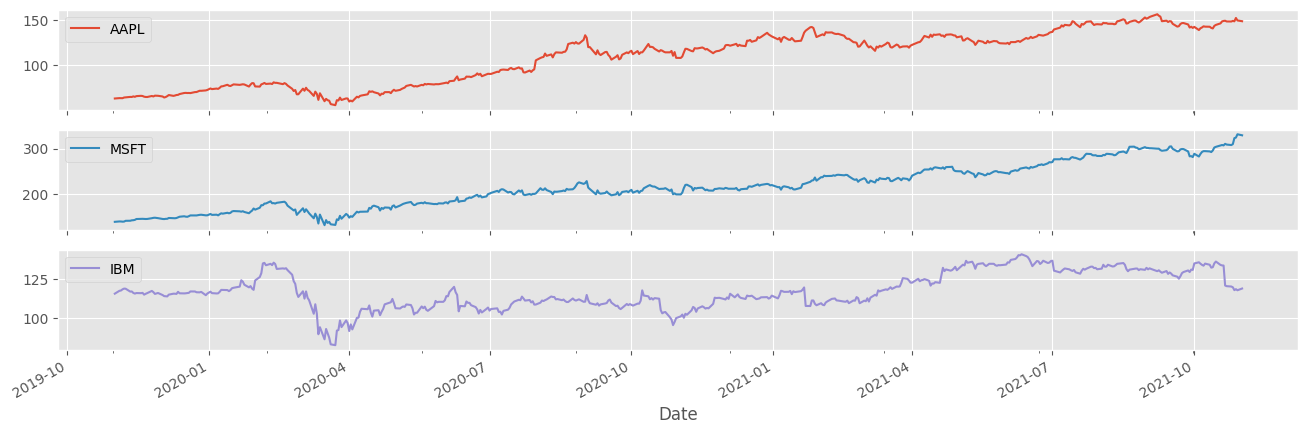

In [23]:
df.plot(subplots=True)
plt.show()

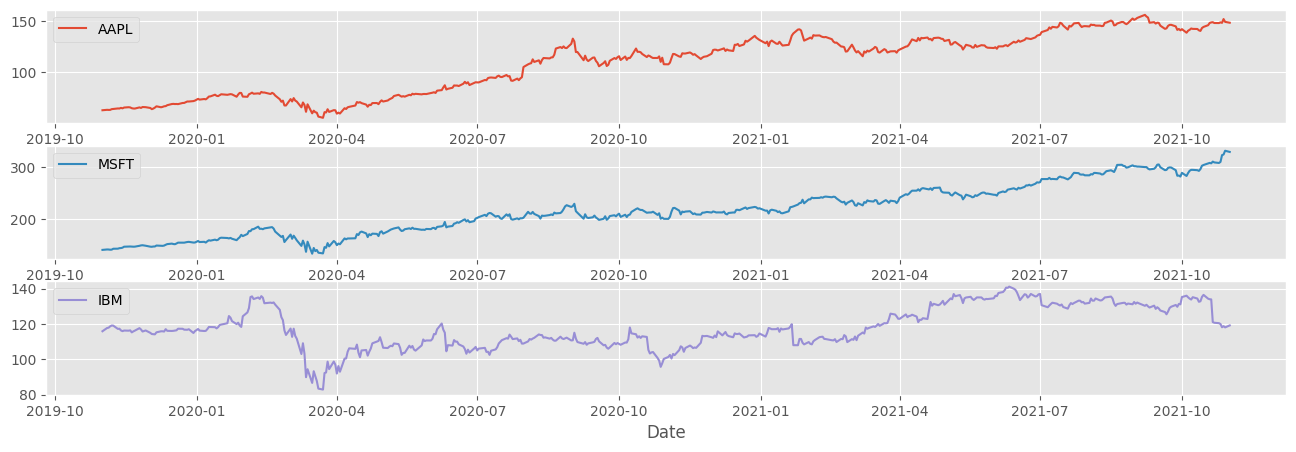

In [24]:
df.plot(subplots=True, sharex=False)
plt.show()

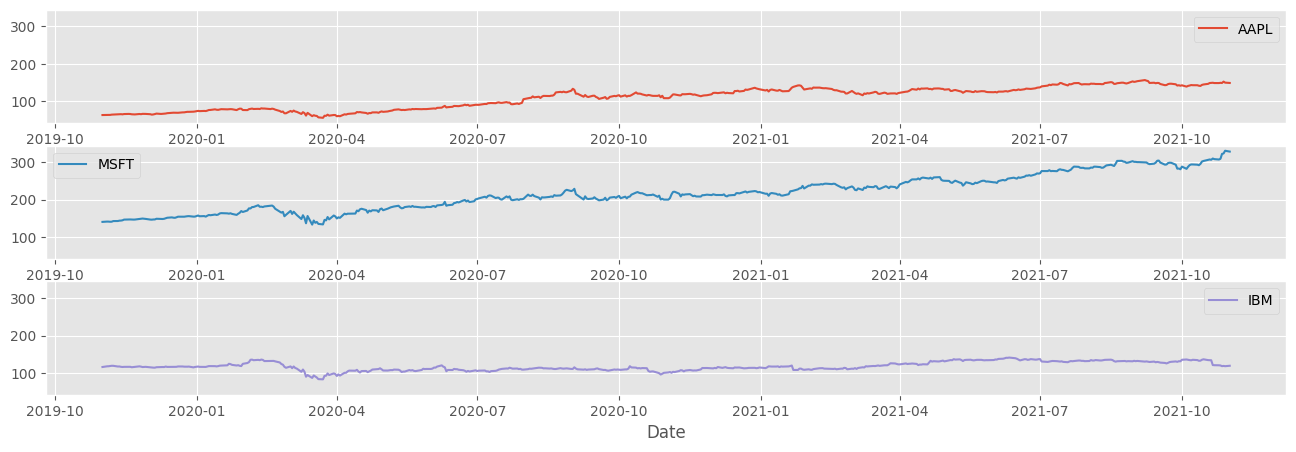

In [25]:
df.plot(subplots=True, sharex=False, sharey=True)
plt.show()

In [26]:
df_n = df.div(df.iloc[0], axis=1)
df_n

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937
...,...,...,...
2021-10-26,2.373098,2.202327,1.035316
2021-10-27,2.365629,2.295076,1.019354
2021-10-28,2.424749,2.303456,1.024810


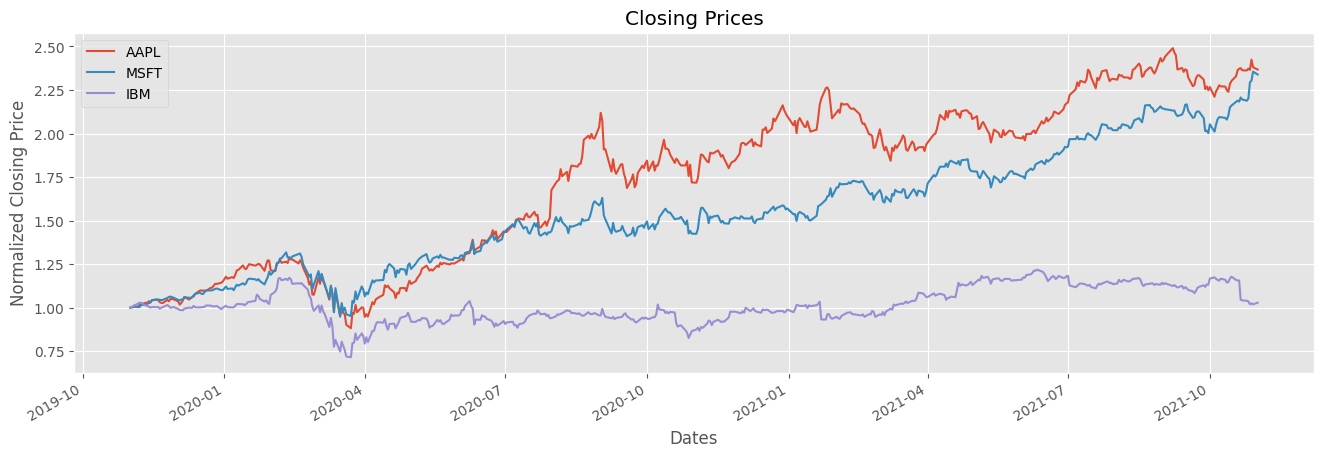

In [27]:
df_n.plot(
            title='Closing Prices',
            ylabel= 'Normalized Closing Price',
            xlabel='Dates');

In [28]:
import hvplot.pandas 


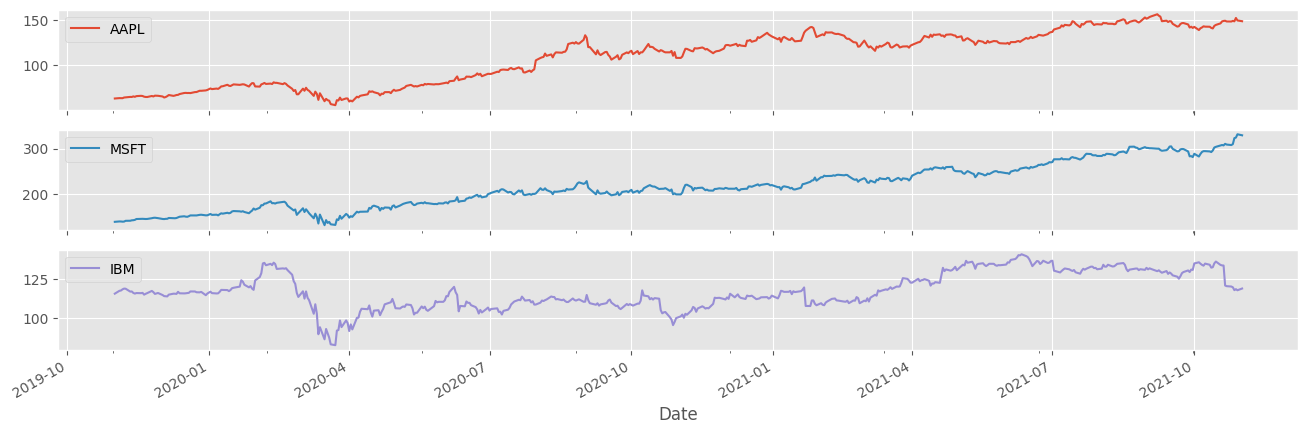

In [29]:
df.plot(subplots=True)
plt.show()

In [30]:
df.hvplot(subplots=False)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [31]:
df.hvplot(subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [32]:
df.hvplot(subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [33]:
sp500 = pd.read_csv('sp500_companies.csv')

In [34]:
sp500.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [35]:
sector_count = sp500['Sector'].value_counts()

# Count the frequency of each sector from the list of companies
sector_count = sp500['Sector'].value_counts()

# Grab the `Symbol` and `Market Cap` columns
market_cap = sp500.loc[:, ['Symbol', 'Market Cap']]

# Set the 'Symbol' as the index
market_cap.set_index(market_cap['Symbol'], inplace=True)

# Drop the extra 'Symbol' column
market_cap.drop(columns=['Symbol'], inplace=True)

# Filter down to 20 companies with the largest market caps
top_20_market_cap = market_cap.nlargest(20, 'Market Cap')

In [64]:
top_20_market_cap.hvplot(title='Top 20 Market Cap Companies (in billions)', kind='bar', rot=45)


:Bars   [Symbol]   (Market Cap)

In [37]:
top_20_market_cap.hvplot.line(title='Top 20 Market Cap Companies (in billions)')


:Curve   [Symbol]   (Market Cap)

In [38]:
top_20_market_cap.hvplot.bar(title='Top 20 Market Cap Companies (in billions)')


:Bars   [Symbol]   (Market Cap)

In [39]:
top_20_market_cap.hvplot.bar(title='Top 20 Market Cap Companies (in billions)', rot=90)


:Bars   [Symbol]   (Market Cap)

In [40]:
sp500.hvplot.scatter(
    title='Top 20 Market Cap Companies (in billions) - EPS versus Price', 
    x='Earnings/Share', 
    y='Price')

:Scatter   [Earnings/Share]   (Price)

In [66]:
sp500.hvplot(
    kind='scatter',
    title='Top 20 Market Cap Companies (in billions) - EPS versus Price', 
    x='Earnings/Share', 
    y='Price',
    hover_cols = ['Name', 'Symbol']
)

:Scatter   [Earnings/Share]   (Price,Name,Symbol)

<Axes: xlabel='Sector'>

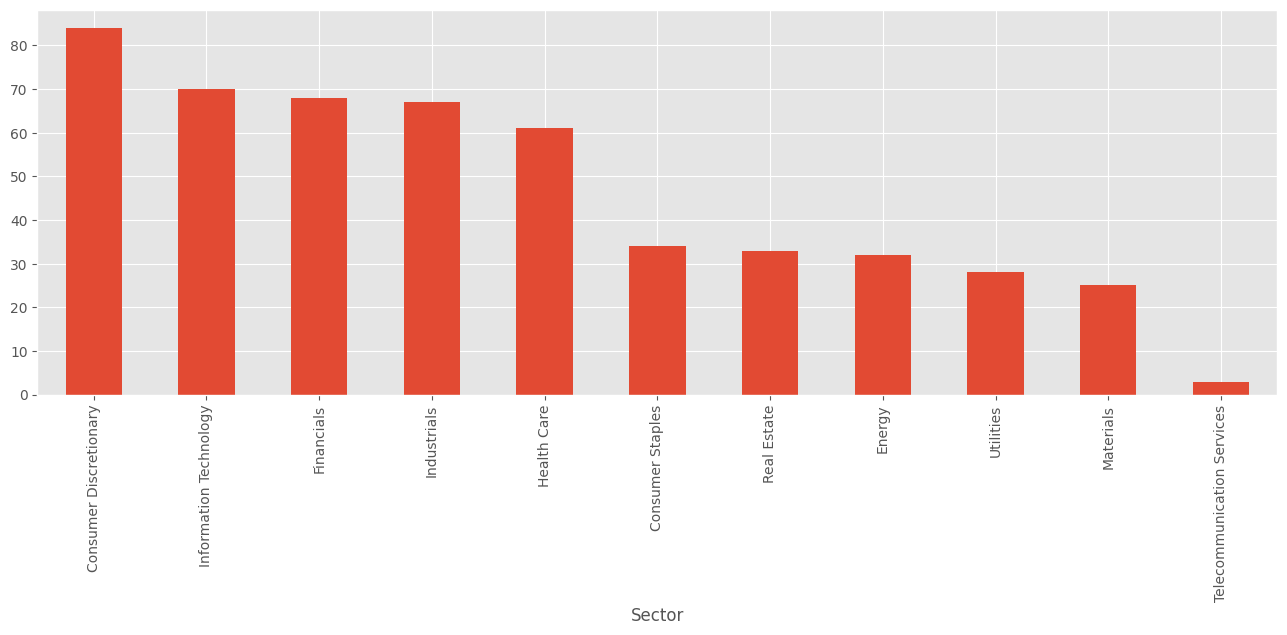

In [42]:
sp500['Sector'].value_counts().plot(kind='bar')

<Axes: xlabel='Sector'>

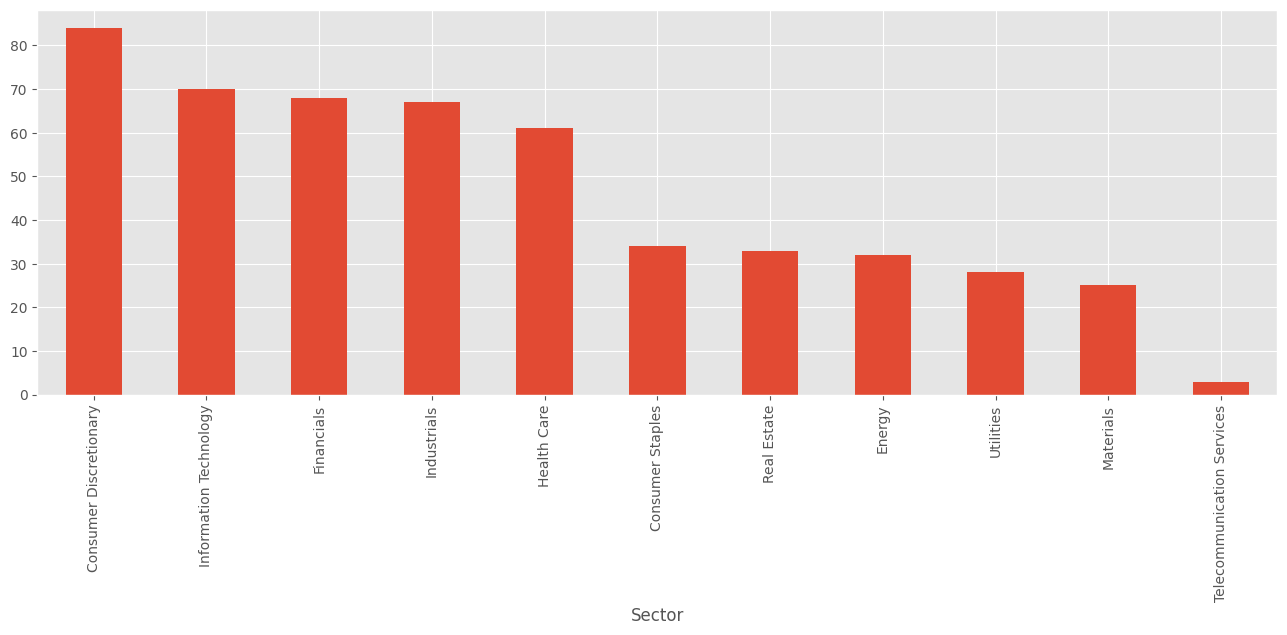

In [43]:
sp500['Sector'].value_counts().plot.bar()

In [67]:
sp500['Sector'].value_counts().hvplot(kind='bar').opts(
    hover_color='orange',
    color='purple'
)

:Bars   [Sector]   (count)

In [44]:
sp500['Sector'].value_counts().hvplot.bar(rot=45) + top_20_market_cap.hvplot.line(title='Top 20 Market Cap Companies (in billions)')


:Layout
   .Bars.Count :Bars   [Sector]   (count)
   .Curve.I    :Curve   [Symbol]   (Market Cap)

In [45]:
(sp500['Sector'].value_counts().hvplot.bar(rot=45) + top_20_market_cap.hvplot.line(title='Top 20 Market Cap Companies (in billions)')
).cols(1)

:Layout
   .Bars.Count :Bars   [Sector]   (count)
   .Curve.I    :Curve   [Symbol]   (Market Cap)

In [46]:
sp500['52 Week High'].hvplot() * sp500['52 Week Low'].hvplot()

:Overlay
   .Curve.A_52_Week_High :Curve   [index]   (52 Week High)
   .Curve.A_52_Week_Low  :Curve   [index]   (52 Week Low)

In [47]:
sp500['52 Week High'].hvplot() + sp500['52 Week Low'].hvplot()

:Layout
   .Curve.A_52_Week_High :Curve   [index]   (52 Week High)
   .Curve.A_52_Week_Low  :Curve   [index]   (52 Week Low)

In [48]:
df = pd.read_csv('hospital_claims.csv')
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [49]:
# Slice the DataFrame to consist of only "552 - MEDICAL BACK PROBLEMS W/O MCC" information
procedure_552_charges = df[
    df["DRG Definition"] == "552 - MEDICAL BACK PROBLEMS W/O MCC"
]

# Review the DataFrame
procedure_552_charges.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
118109,552 - MEDICAL BACK PROBLEMS W/O MCC,50128,TRI-CITY MEDICAL CENTER,4002 VISTA WAY,OCEANSIDE,CA,92056,CA - San Diego,14,26610.85,5970.57,5007.14
118137,552 - MEDICAL BACK PROBLEMS W/O MCC,50764,SHASTA REGIONAL MEDICAL CENTER,1100 BUTTE ST,REDDING,CA,96001,CA - Redding,29,36127.31,6305.17,5219.93
118355,552 - MEDICAL BACK PROBLEMS W/O MCC,60001,NORTH COLORADO MEDICAL CENTER,1801 16TH STREET,GREELEY,CO,80631,CO - Greeley,48,20543.02,5454.12,4252.91
118383,552 - MEDICAL BACK PROBLEMS W/O MCC,100009,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,37,40265.86,6362.72,5466.67
120657,552 - MEDICAL BACK PROBLEMS W/O MCC,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,FL,33901,FL - Fort Myers,83,20712.84,4889.45,3755.37


In [68]:
# Group data by state and average total payments, and then sum the values
payments_by_state = procedure_552_charges[["Average Total Payments", "Provider State"]]

# Sum the average total payments by state
total_payments_by_state = payments_by_state.groupby("Provider State").sum()
total_payments_by_state

,Average Total Payments
Provider State,
AK,7134.40
AL,149613.29
AR,116147.95
AZ,151868.43
CA,1068146.26
CO,138644.56
CT,136766.25
DC,44838.67
DE,22953.18


In [70]:
# Plot data using hvplot.bar
total_payments_by_state.hvplot.bar(rot=90)

:Bars   [Provider State]   (Average Total Payments)

In [52]:
# Sort the state data values by Average Total Paymnts
sorted_total_payments_by_state = total_payments_by_state.sort_values("Average Total Payments")
# Plot the sorted data
sorted_total_payments_by_state.hvplot()

:Curve   [Provider State]   (Average Total Payments)

In [53]:
# Compose plots using + operator.  
total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State]   (Average Total Payments)

hvPlot automatically assigns the x-axis values on the second subplot to align with the x-axis values of the first subplot. There’s a way to overcome this issue by renaming the index of one of the DataFrames before creating the composite plots, as the following code shows.

In [54]:
# We prevent this by renaming the index in one of the dataframes before plotting them.
sorted_total_payments_by_state.index.names = ['Provider State Sorted']

total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State Sorted]   (Average Total Payments)

In [55]:
# Group data by state and average medicare payments, and then sum the values
medicare_payment_by_state = procedure_552_charges[["Average Medicare Payments", "Provider State"]]

total_medicare_by_state = medicare_payment_by_state.groupby("Provider State").sum()

total_medicare_by_state.head()

,Average Medicare Payments
Provider State,
AK,6008.80
AL,112154.39
AR,90176.26
AZ,120926.12
CA,901778.32


In [56]:
# Sort data values
sorted_total_medicare_by_state = total_medicare_by_state.sort_values("Average Medicare Payments")

sorted_total_medicare_by_state.hvplot.bar()

:Bars   [Provider State]   (Average Medicare Payments)

In [57]:
# Overlay plots of different type using * operator
sorted_total_payments_by_state.hvplot.line(label="Average Total Payments") * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")


:Overlay
   .Curve.Average_Total_Payments   :Curve   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

In [58]:
# Overlay plots of the same type using * operator
sorted_total_payments_by_state.hvplot.bar(label="Average Total Payments") * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")

:Overlay
   .Bars.Average_Total_Payments    :Bars   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

In [59]:
total_payments_by_state.hvplot.bar()

:Bars   [Provider State]   (Average Total Payments)

In [60]:
total_payments_by_state.hvplot.bar(rot=90).opts(
     title="Total Payments Chart",
     color='purple',
     hover_color='orange',
     yformatter='%.0f'
)

:Bars   [Provider State]   (Average Total Payments)